In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saadaliyaseen/analyzing-student-academic-trends")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\mrcch\.cache\kagglehub\datasets\saadaliyaseen\analyzing-student-academic-trends\versions\1


In [44]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.1.1
📦 NumPy version: 1.25.2


In [4]:
import os


csv_files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV files found in the specified directory!")

csv_path = os.path.join(path, csv_files[0])

df = pd.read_csv(csv_path)


# Display basic information
print("="*70)
print(csv_files[0], " DATASET")
print("="*70)

print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
print(f"Columns: {', '.join(df.columns)}")
print("\nData Types:")
print(df.dtypes)
print("="*70)

# First look at the data
df.head(10)

student_exam_scores.csv  DATASET
Shape: 200 rows × 6 columns
Columns: student_id, hours_studied, sleep_hours, attendance_percent, previous_scores, exam_score

Data Types:
student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
5,S006,8.4,5.1,58.5,75,35.7
6,S007,10.8,6.0,54.2,88,37.9
7,S008,2.0,4.3,75.8,55,18.3
8,S009,5.6,5.9,81.6,84,34.7
9,S010,1.3,8.9,66.8,70,24.7


In [10]:
print("Quick stats")
display(df.describe(include='all').transpose())
print("="*70)

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("\n Missing values by column: \n")
display(missing.to_frame("Missing Count"))
print("="*70)

df.describe(include='all').transpose().head(10)
df.head(5)


Quick stats


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,200,200,S001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours_studied,200.0,NaN,NaN,NaN,6.3255,3.227317,1.0,3.5,6.15,9.0,12.0
sleep_hours,200.0,NaN,NaN,NaN,6.622,1.497138,4.0,5.3,6.7,8.025,9.0
attendance_percent,200.0,NaN,NaN,NaN,74.83,14.249905,50.3,62.2,75.25,87.425,100.0
previous_scores,200.0,NaN,NaN,NaN,66.8,15.663869,40.0,54.0,67.5,80.0,95.0
exam_score,200.0,NaN,NaN,NaN,33.955,6.789548,17.1,29.5,34.05,38.75,51.3



 Missing values by column: 



,Missing Count


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [12]:
df_clean = df.copy()

df_clean = df_clean.drop(columns=['student_id'])

print("Cleaned Data Preview: ")
display(df_clean.head())

print("Data Types after cleaning:")
print(df_clean.dtypes)

Cleaned Data Preview: 


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3


Data Types after cleaning:
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object


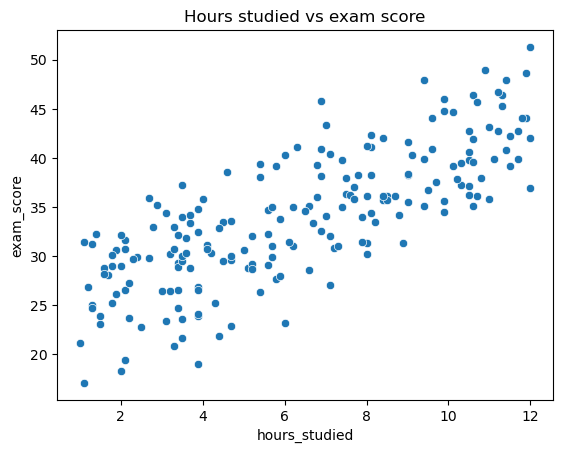

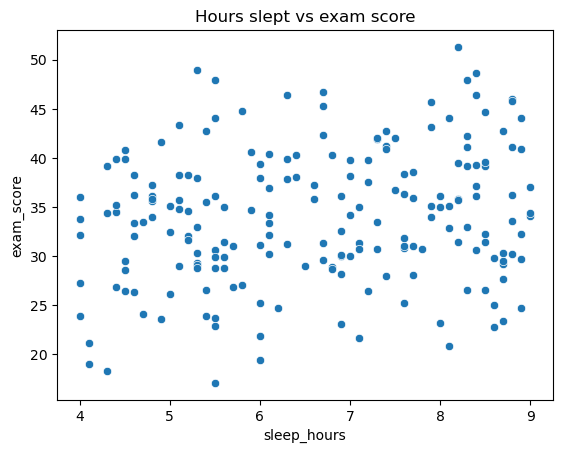

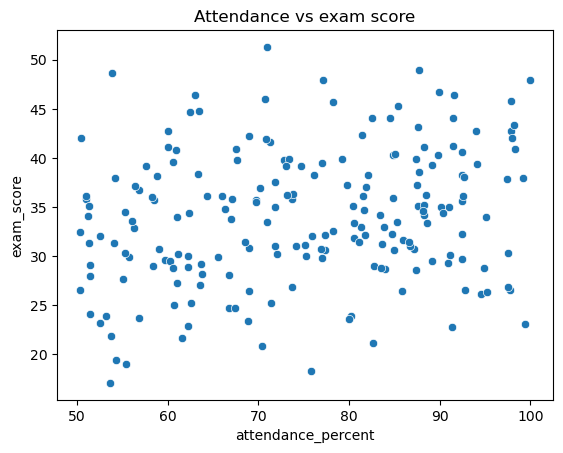

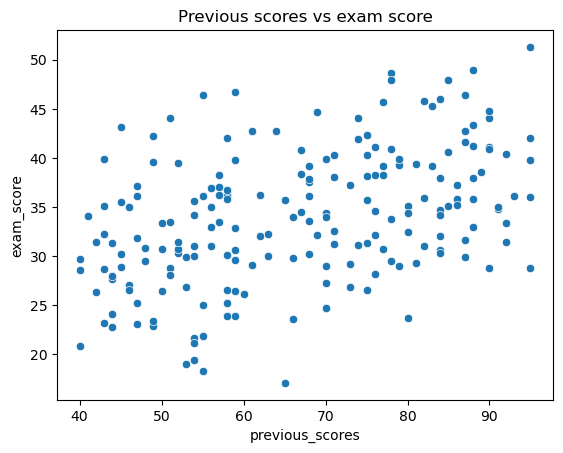

In [16]:
sns.scatterplot(x='hours_studied', y='exam_score', data = df_clean)
plt.title("Hours studied vs exam score")
plt.show()

sns.scatterplot(x='sleep_hours', y='exam_score', data = df_clean)
plt.title("Hours slept vs exam score")
plt.show()

sns.scatterplot(x='attendance_percent', y='exam_score', data = df_clean)
plt.title("Attendance vs exam score")
plt.show()

sns.scatterplot(x='previous_scores', y='exam_score', data = df_clean)
plt.title("Previous scores vs exam score")
plt.show()

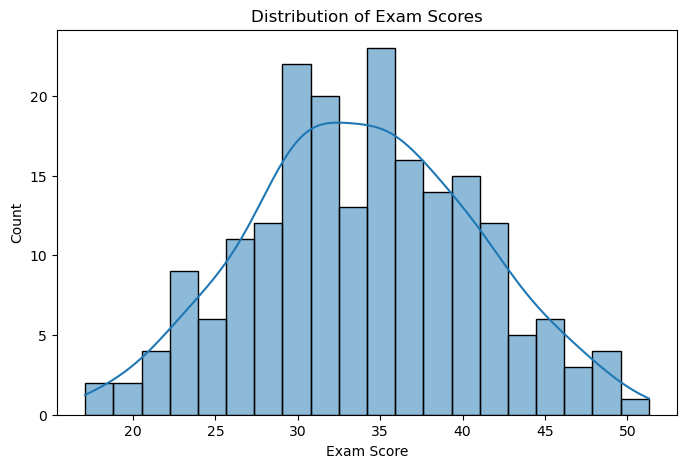

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['exam_score'], kde=True, bins=20)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Hours slept distribution')

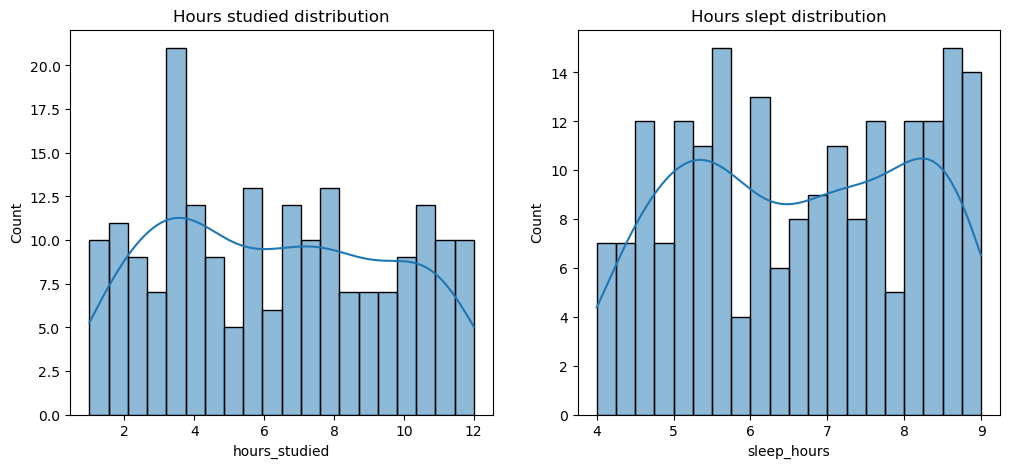

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['hours_studied'], kde=True, bins=20, ax=ax[0])
ax[0].set_title("Hours studied distribution")

sns.histplot(df['sleep_hours'], kde=True, bins=20, ax=ax[1])
ax[1].set_title("Hours slept distribution")

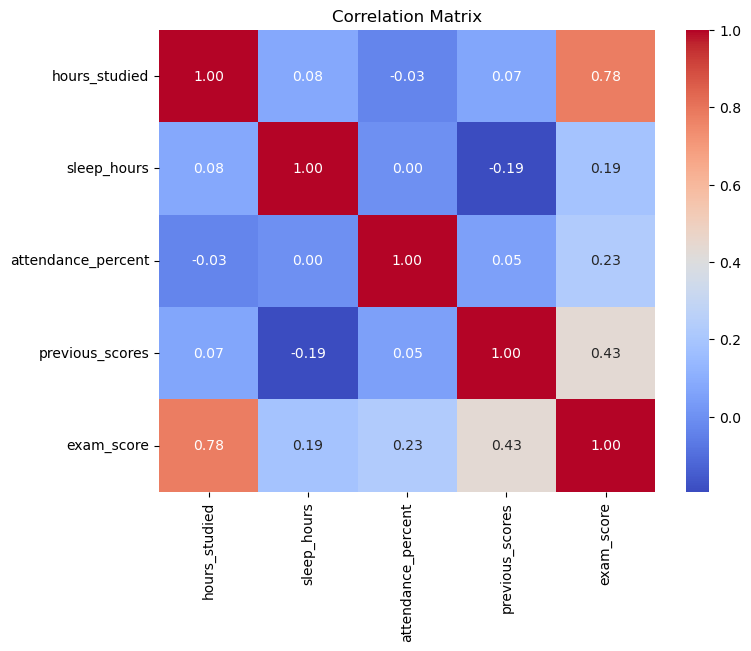

In [24]:
corr = df.drop(columns=['student_id']).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

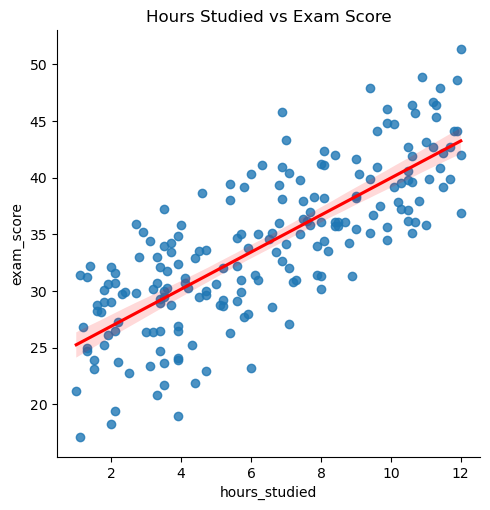

In [25]:
sns.lmplot(x='hours_studied', y='exam_score', data=df, line_kws={'color': 'red'})
plt.title("Hours Studied vs Exam Score")
plt.show()

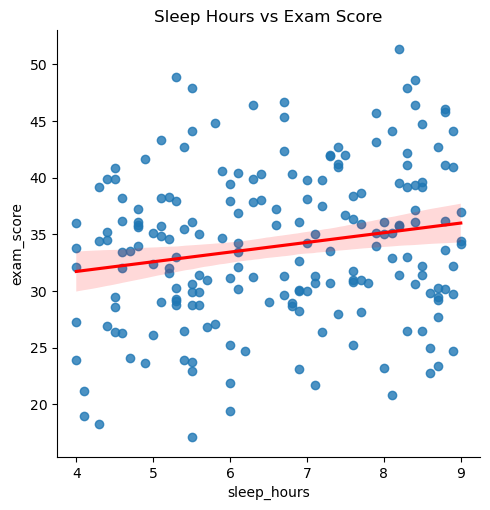

In [26]:
sns.lmplot(x='sleep_hours', y='exam_score', data=df, line_kws={'color': 'red'})
plt.title("Sleep Hours vs Exam Score")
plt.show()

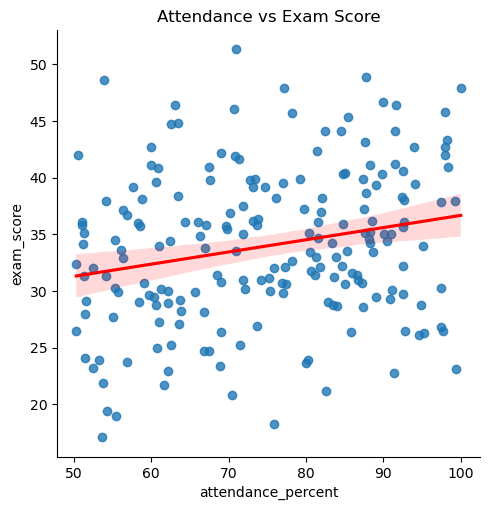

In [27]:
sns.lmplot(x='attendance_percent', y='exam_score', data=df, line_kws={'color': 'red'})
plt.title("Attendance vs Exam Score")
plt.show()

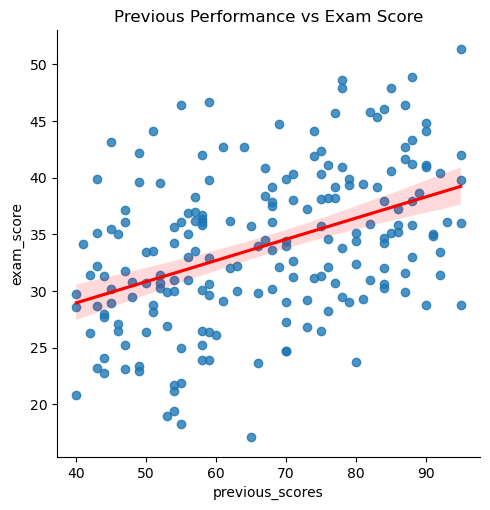

In [28]:
sns.lmplot(x='previous_scores', y='exam_score', data=df, line_kws={'color': 'red'})
plt.title("Previous Performance vs Exam Score")
plt.show()

In [29]:
corr['exam_score'].sort_values(ascending=False)

exam_score            1.000000
hours_studied         0.776751
previous_scores       0.431105
attendance_percent    0.225713
sleep_hours           0.188222
Name: exam_score, dtype: float64

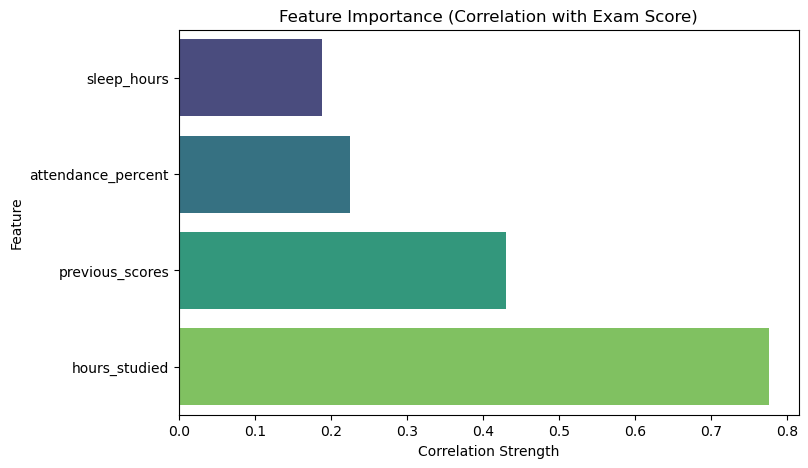

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_with_target = (
    df.corr(numeric_only=True)['exam_score']
    .drop('exam_score')
    .sort_values(ascending=True)
)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title("Feature Importance (Correlation with Exam Score)")
plt.xlabel("Correlation Strength")
plt.ylabel("Feature")
plt.show()


In [34]:
df_model = df.drop(columns=['student_id'])

X = df_model.drop(columns=['exam_score'])
y = df_model['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (160, 4)
Testing set shape: (40, 4)


R² Score: 0.854
Mean Absolute Error: 2.31


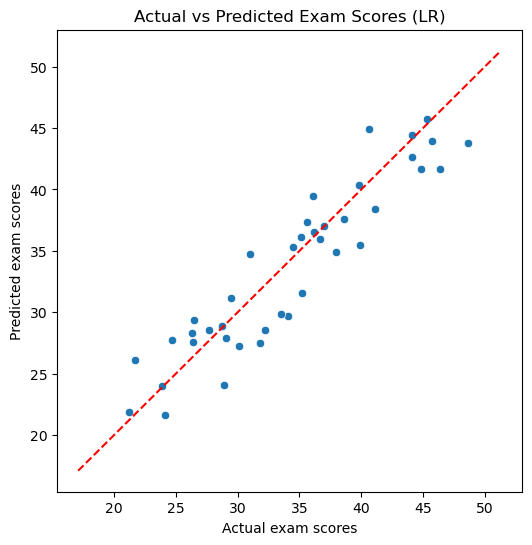

              Feature  Coefficient
0       hours_studied     1.549341
1         sleep_hours     0.884156
3     previous_scores     0.183034
2  attendance_percent     0.108949


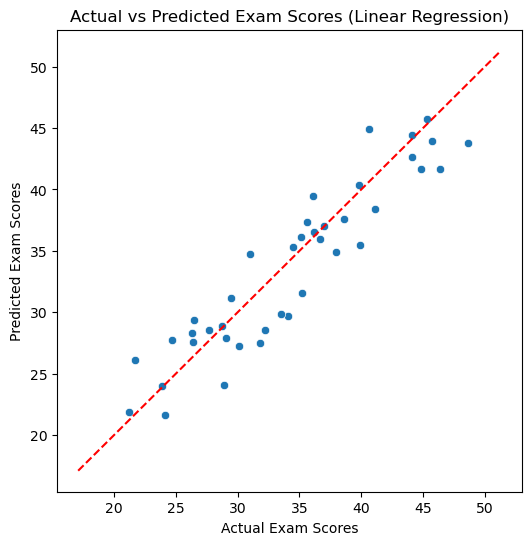

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual exam scores')
plt.ylabel("Predicted exam scores")
plt.title("Actual vs Predicted Exam Scores (LR)")
plt.show()


coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

Random Forest R²: 0.801
Random Forest MAE: 2.88


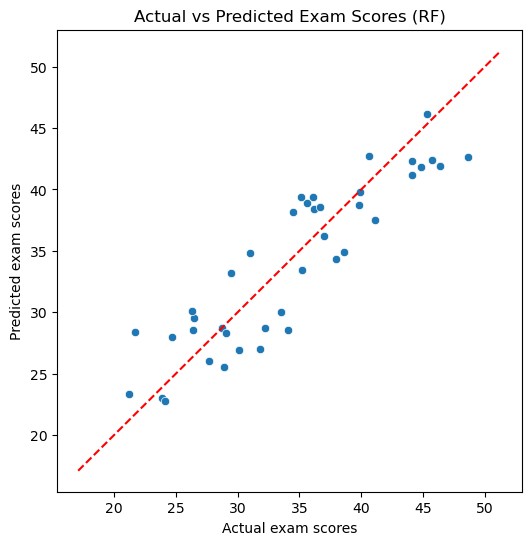

              Feature  Coefficient
0       hours_studied     0.654998
3     previous_scores     0.181566
2  attendance_percent     0.103878
1         sleep_hours     0.059558


In [51]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


print(f"Random Forest R²: {r2_rf:.3f}")
print(f"Random Forest MAE: {mae_rf:.2f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual exam scores')
plt.ylabel("Predicted exam scores")
plt.title("Actual vs Predicted Exam Scores (RF)")
plt.show()


coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': rf.feature_importances_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

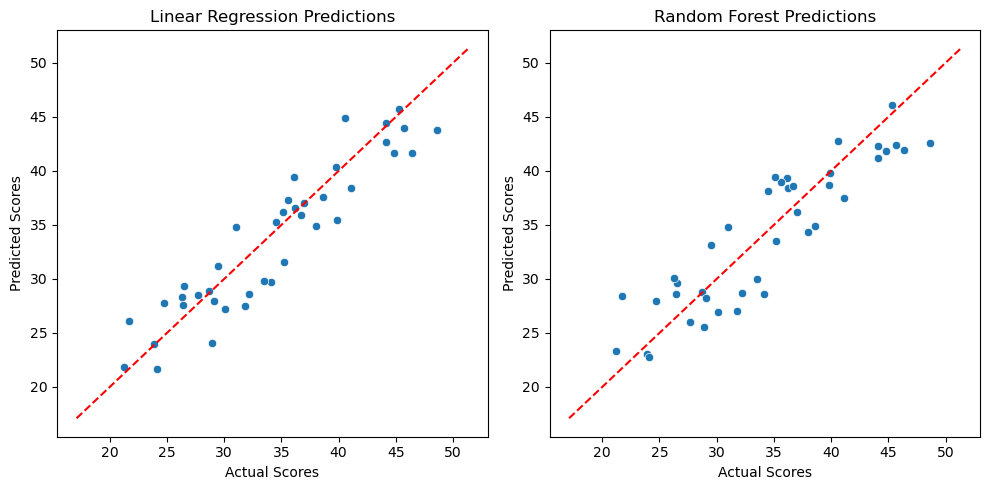

In [60]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Linear Regression Predictions")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")

plt.subplot(1,2,2)
sns.scatterplot(x = y_test, y = y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Random Forest Predictions")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")

plt.tight_layout()
plt.show()

In [61]:
print(f"Linear Regression  → R²: {r2:.3f}, MAE: {mae:.2f}")
print(f"Random Forest      → R²: {r2_rf:.3f}, MAE: {mae_rf:.2f}")

Linear Regression  → R²: 0.854, MAE: 2.31
Random Forest      → R²: 0.801, MAE: 2.88


In [62]:
sample = pd.DataFrame({
    'hours_studied': [8],
    'sleep_hours': [7],
    'attendance_percent': [85],
    'previous_scores': [70]
})

predicted_score = model.predict(sample)[0]
print(f"Predicted Exam Score: {predicted_score:.2f}")

Predicted Exam Score: 38.45


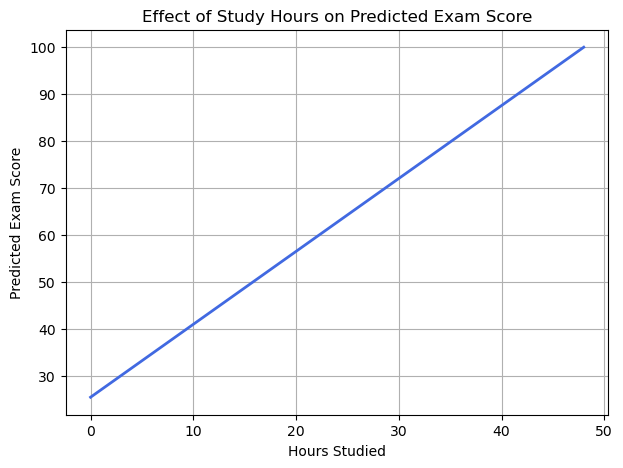

In [74]:
base = {
    'hours_studied': 6,
    'sleep_hours': 7,
    'attendance_percent': 80,
    'previous_scores': 70
}

hours_range = np.linspace(0, 48, 50)

scenarios = pd.DataFrame({
    'hours_studied': hours_range,
    'sleep_hours': base['sleep_hours'],
    'attendance_percent': base['attendance_percent'],
    'previous_scores': base['previous_scores']
})

predicted = model.predict(scenarios)

plt.figure(figsize=(7,5))
plt.plot(hours_range, predicted, color='royalblue', linewidth=2)
plt.title("Effect of Study Hours on Predicted Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Predicted Exam Score")
plt.grid(True)
plt.show()


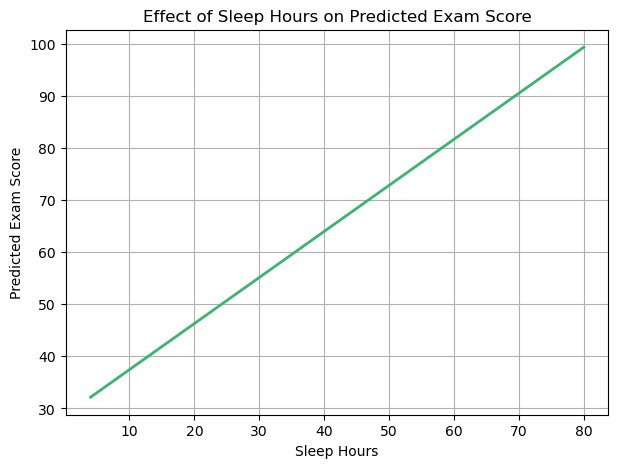

In [81]:
sleep_range = np.linspace(4, 80, 50)

scenarios = pd.DataFrame({
    'hours_studied': base['hours_studied'],
    'sleep_hours': sleep_range,
    'attendance_percent': base['attendance_percent'],
    'previous_scores': base['previous_scores']
})

predicted = model.predict(scenarios)

plt.figure(figsize=(7,5))
plt.plot(sleep_range, predicted, color='mediumseagreen', linewidth=2)
plt.title("Effect of Sleep Hours on Predicted Exam Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Predicted Exam Score")
plt.grid(True)
plt.show()

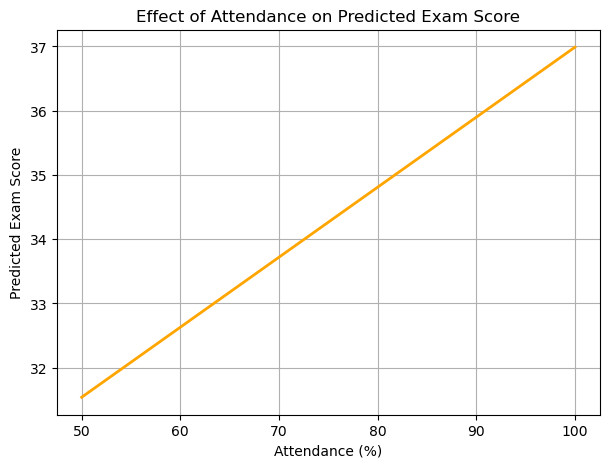

In [82]:
attendance_range = np.linspace(50, 100, 50)

scenarios = pd.DataFrame({
    'hours_studied': base['hours_studied'],
    'sleep_hours': base['sleep_hours'],
    'attendance_percent': attendance_range,
    'previous_scores': base['previous_scores']
})

predicted = model.predict(scenarios)

plt.figure(figsize=(7,5))
plt.plot(attendance_range, predicted, color='orange', linewidth=2)
plt.title("Effect of Attendance on Predicted Exam Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Predicted Exam Score")
plt.grid(True)
plt.show()

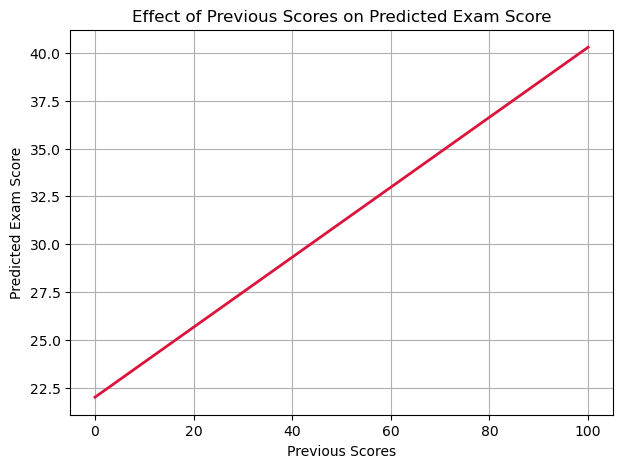

In [83]:
previous_range = np.linspace(0, 100, 50)

scenarios = pd.DataFrame({
    'hours_studied': base['hours_studied'],
    'sleep_hours': base['sleep_hours'],
    'attendance_percent': base['attendance_percent'],
    'previous_scores': previous_range
})

predicted = model.predict(scenarios)

plt.figure(figsize=(7,5))
plt.plot(previous_range, predicted, color='crimson', linewidth=2)
plt.title("Effect of Previous Scores on Predicted Exam Score")
plt.xlabel("Previous Scores")
plt.ylabel("Predicted Exam Score")
plt.grid(True)
plt.show()

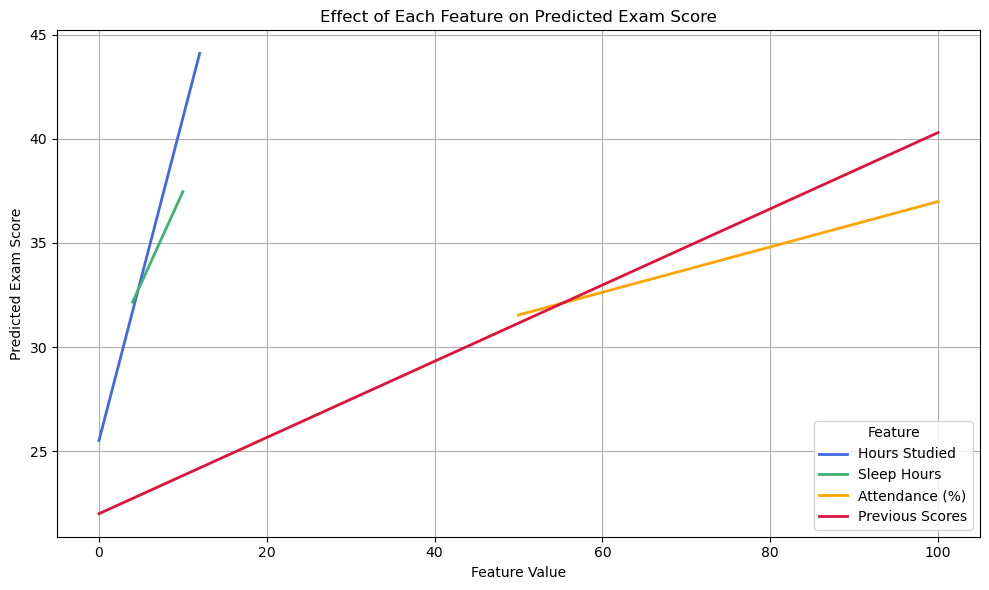

In [84]:
hours_range = np.linspace(0, 12, 50)
sleep_range = np.linspace(4, 10, 50)
attendance_range = np.linspace(50, 100, 50)
previous_range = np.linspace(0, 100, 50)

def predict_curve(feature, values):
    df_scenario = pd.DataFrame({
        'hours_studied': base['hours_studied'],
        'sleep_hours': base['sleep_hours'],
        'attendance_percent': base['attendance_percent'],
        'previous_scores': base['previous_scores'],
    }, index=range(len(values)))
    df_scenario[feature] = values
    return model.predict(df_scenario)

pred_hours = predict_curve('hours_studied', hours_range)
pred_sleep = predict_curve('sleep_hours', sleep_range)
pred_attendance = predict_curve('attendance_percent', attendance_range)
pred_previous = predict_curve('previous_scores', previous_range)


plt.figure(figsize=(10,6))

plt.plot(hours_range, pred_hours, label='Hours Studied', color='royalblue', linewidth=2)
plt.plot(sleep_range, pred_sleep, label='Sleep Hours', color='mediumseagreen', linewidth=2)
plt.plot(attendance_range, pred_attendance, label='Attendance (%)', color='orange', linewidth=2)
plt.plot(previous_range, pred_previous, label='Previous Scores', color='crimson', linewidth=2)

plt.title("Effect of Each Feature on Predicted Exam Score")
plt.xlabel("Feature Value")
plt.ylabel("Predicted Exam Score")
plt.legend(title="Feature", loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()